# Assignment 1



구현에 바로 들어가기에 앞서 전체 네트워크 구조와 각 구성요소의 행렬 차원 및 오차역전파(back propagation) 복습이 1번 과제입니다.  

**?** 에 들어갈 수식을 채워주시면 됩니다!!  

## Matrix Shape 정리

n : sample_data 수  
d : input_dimension  
h : hidden_layer_dimension  
c : output_dimension  

X : input_data  
W1 : layer1_weight  
b1 : layer1_bias  
H : X*W1+b1
A : activation function 거친 value
W2 : layer2_weight  
b2 : layer2_bias  
S : A*W2+b2  
P : softmax 거친 value  

**X==(n,d)  
W1==(d,h) 채워주세요  
b1==(h,)  
H==(n,h) 채워주세요  
A==(n,h)  
W2==(h,c)  
b2==(c,) 채워주세요  
S==(n,c) 채워주세요  
P==(n,c)**

## Matrix 미분 정리
$H = XW+b　　　(n,h) = (n,d)x(d,h)+(h,)$  
$L = f(H)$  
$\frac{\partial L}{\partial W} = \frac{\partial H}{\partial W} \times \frac{\partial L}{\partial H} = X^{T}\frac{\partial L}{\partial H}$ 　채워주세요  
$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial H} \times \frac{\partial H}{\partial X} = \frac{\partial L}{\partial H}W^{T}$ 　채워주세요  
$\frac{\partial L}{\partial b} = 1*\frac{\partial L}{\partial H}$  

## 2Layers Chain Rule 정리
**Forward** 

$H = XW_{1} + b$  
$A = ReLU(H)$  
$S = AW_{2} + b_{2}$  
$P = Softmax(S)$  
$L = -LogLikelihood(P)$


**Backward**

$\frac{\partial L}{\partial S} = P-T$　:　T는 Label  
$\frac{\partial L}{\partial W_{2}} = \frac{\partial S}{\partial W_{2}}\frac{\partial L}{\partial S} = A^{T}(P-T)$ 　채워주세요  
$\frac{\partial L}{\partial b_{2}} = 1*\frac{\partial L}{\partial S} = P-T$  
$\frac{\partial L}{\partial A} = \frac{\partial L}{\partial S}\frac{\partial S}{\partial A} = (P-T)W_{2}^{T}$　채워주세요  
$\frac{\partial L}{\partial H} = \frac{\partial A}{\partial H}\frac{\partial L}{\partial A}$  
$\frac{\partial L}{\partial W_{1}} = \frac{\partial H}{\partial W_{1}}\frac{\partial L}{\partial H} = X^{T}\frac{\partial L}{\partial H}$  
$\frac{\partial L}{\partial b_{1}} = \frac{\partial L}{\partial H}$  

**3 layers 버전은 아래 이미지를 봐주세요~**  (주피터로 수식쓰기 넘 어려워요ㅠ,ㅠ)

In [1]:
from IPython.display import Image

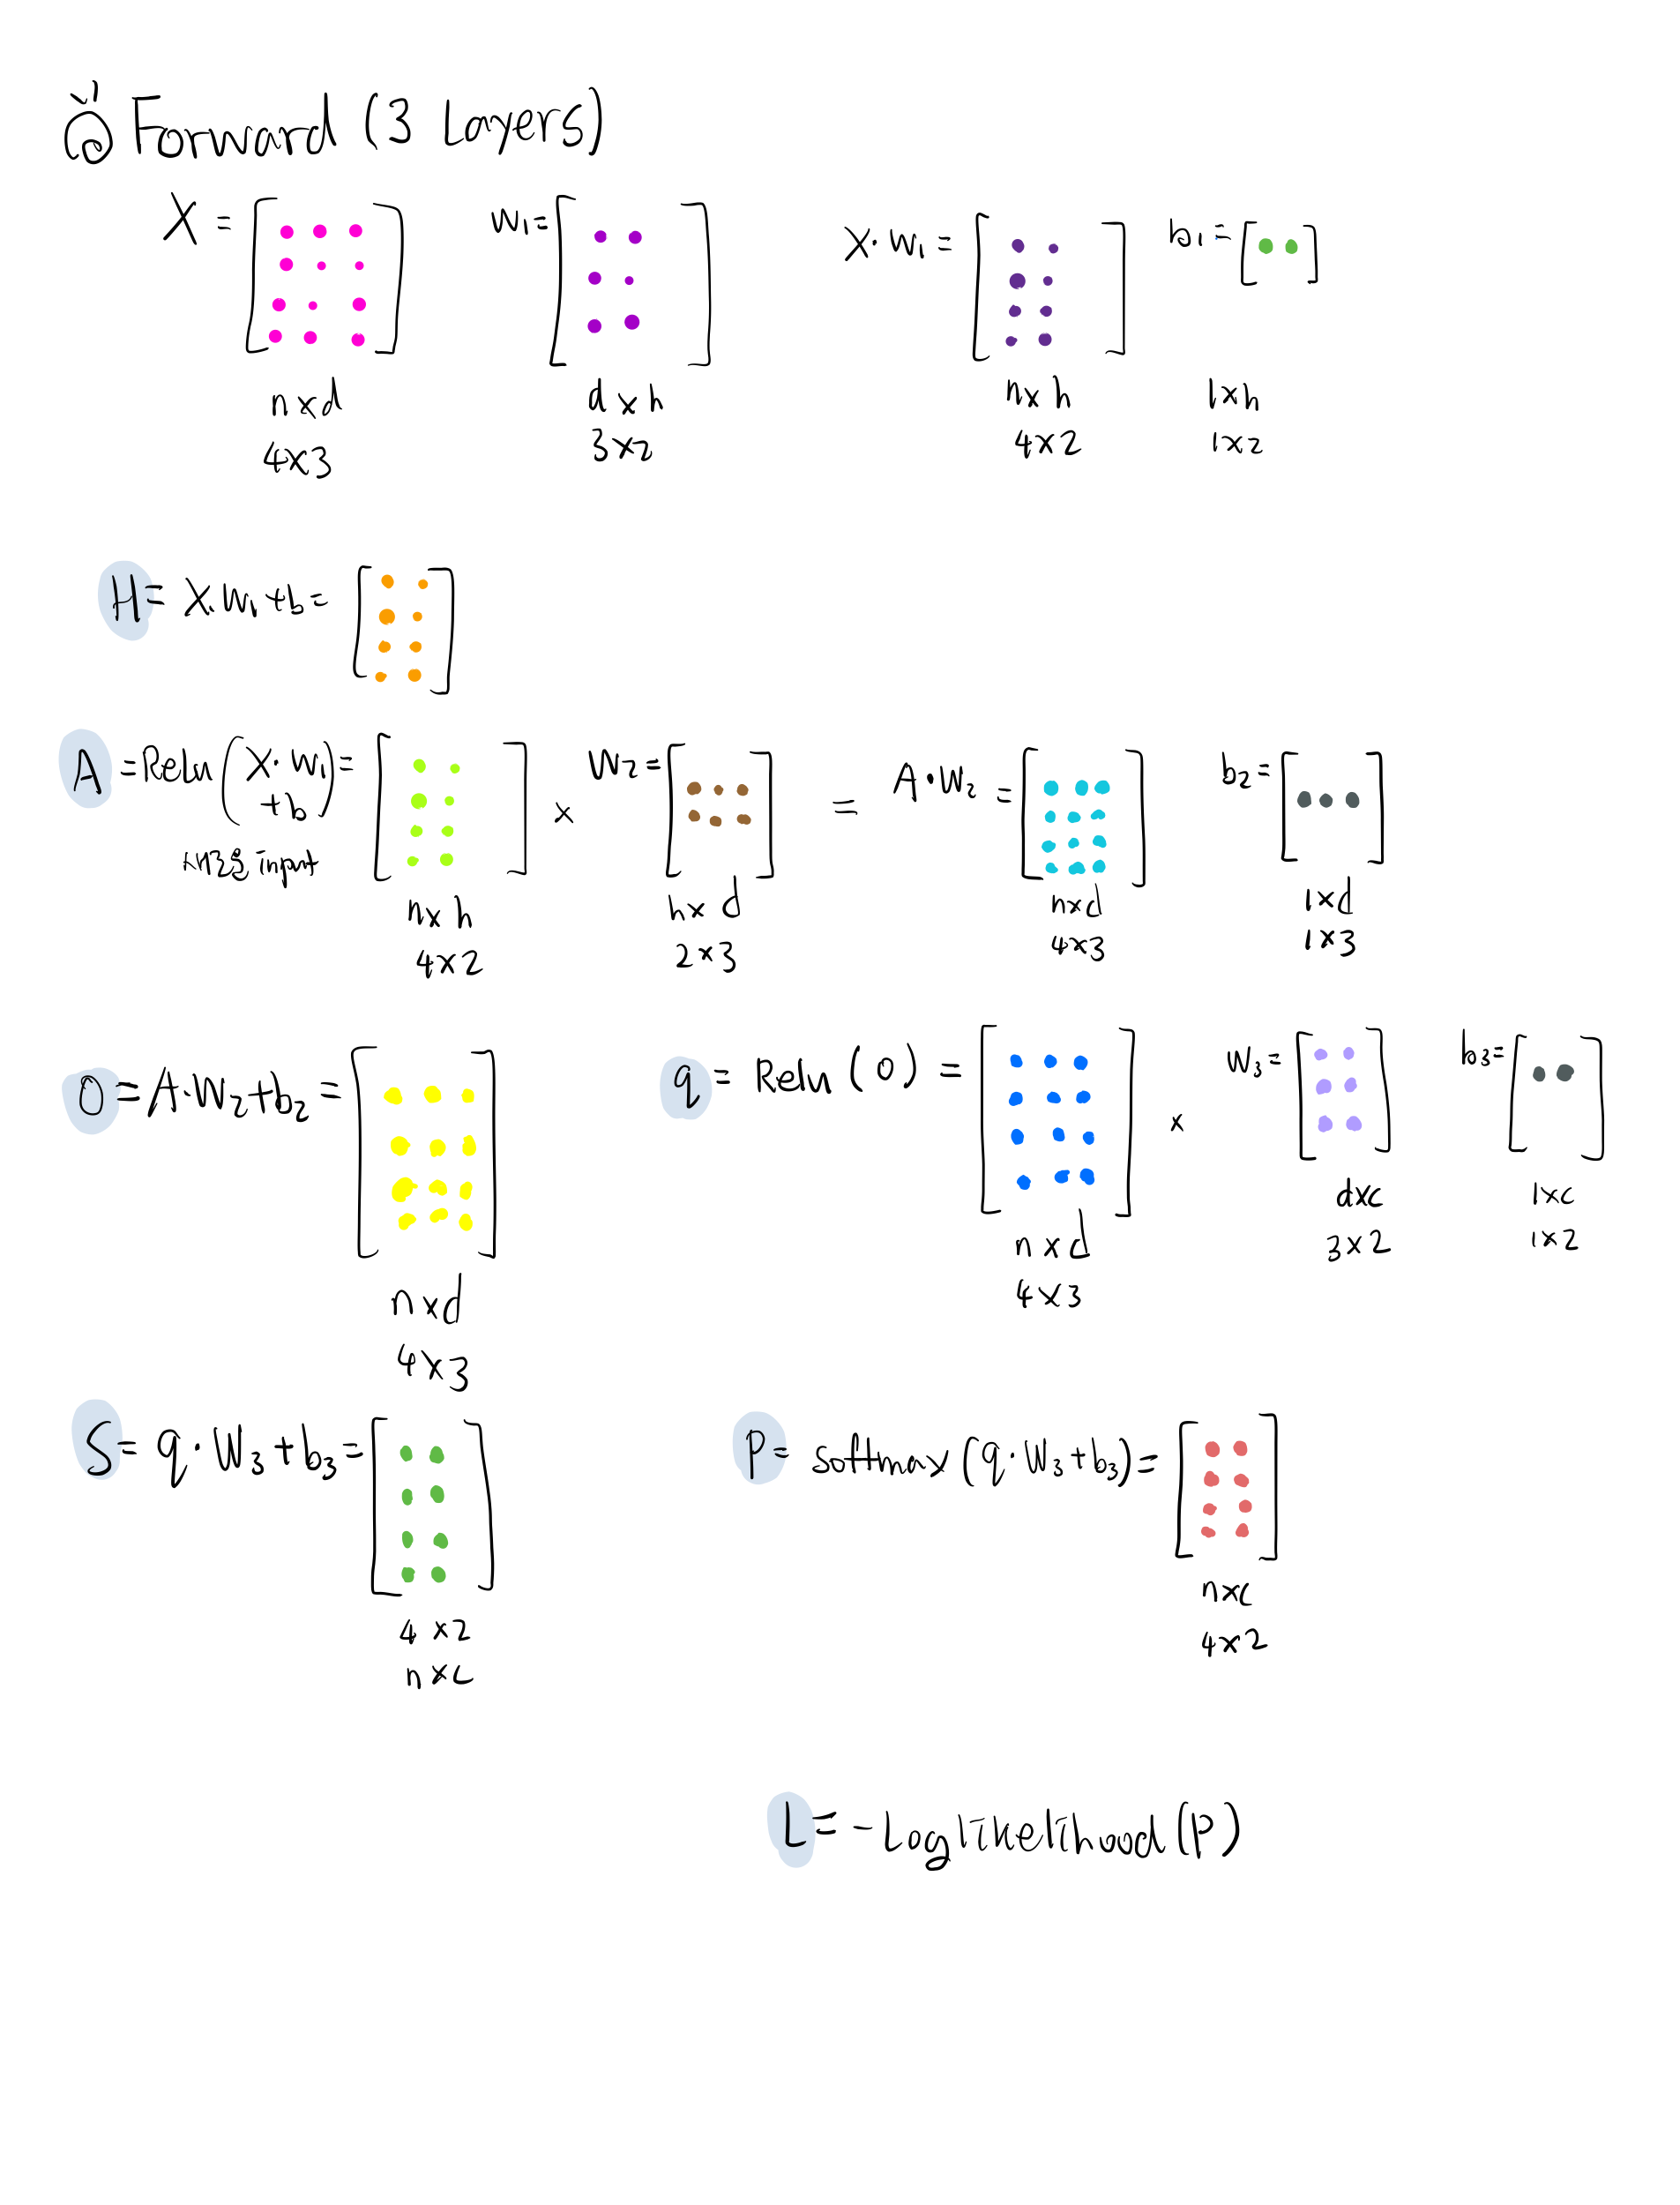

In [2]:
Image("3layer_forward.png")

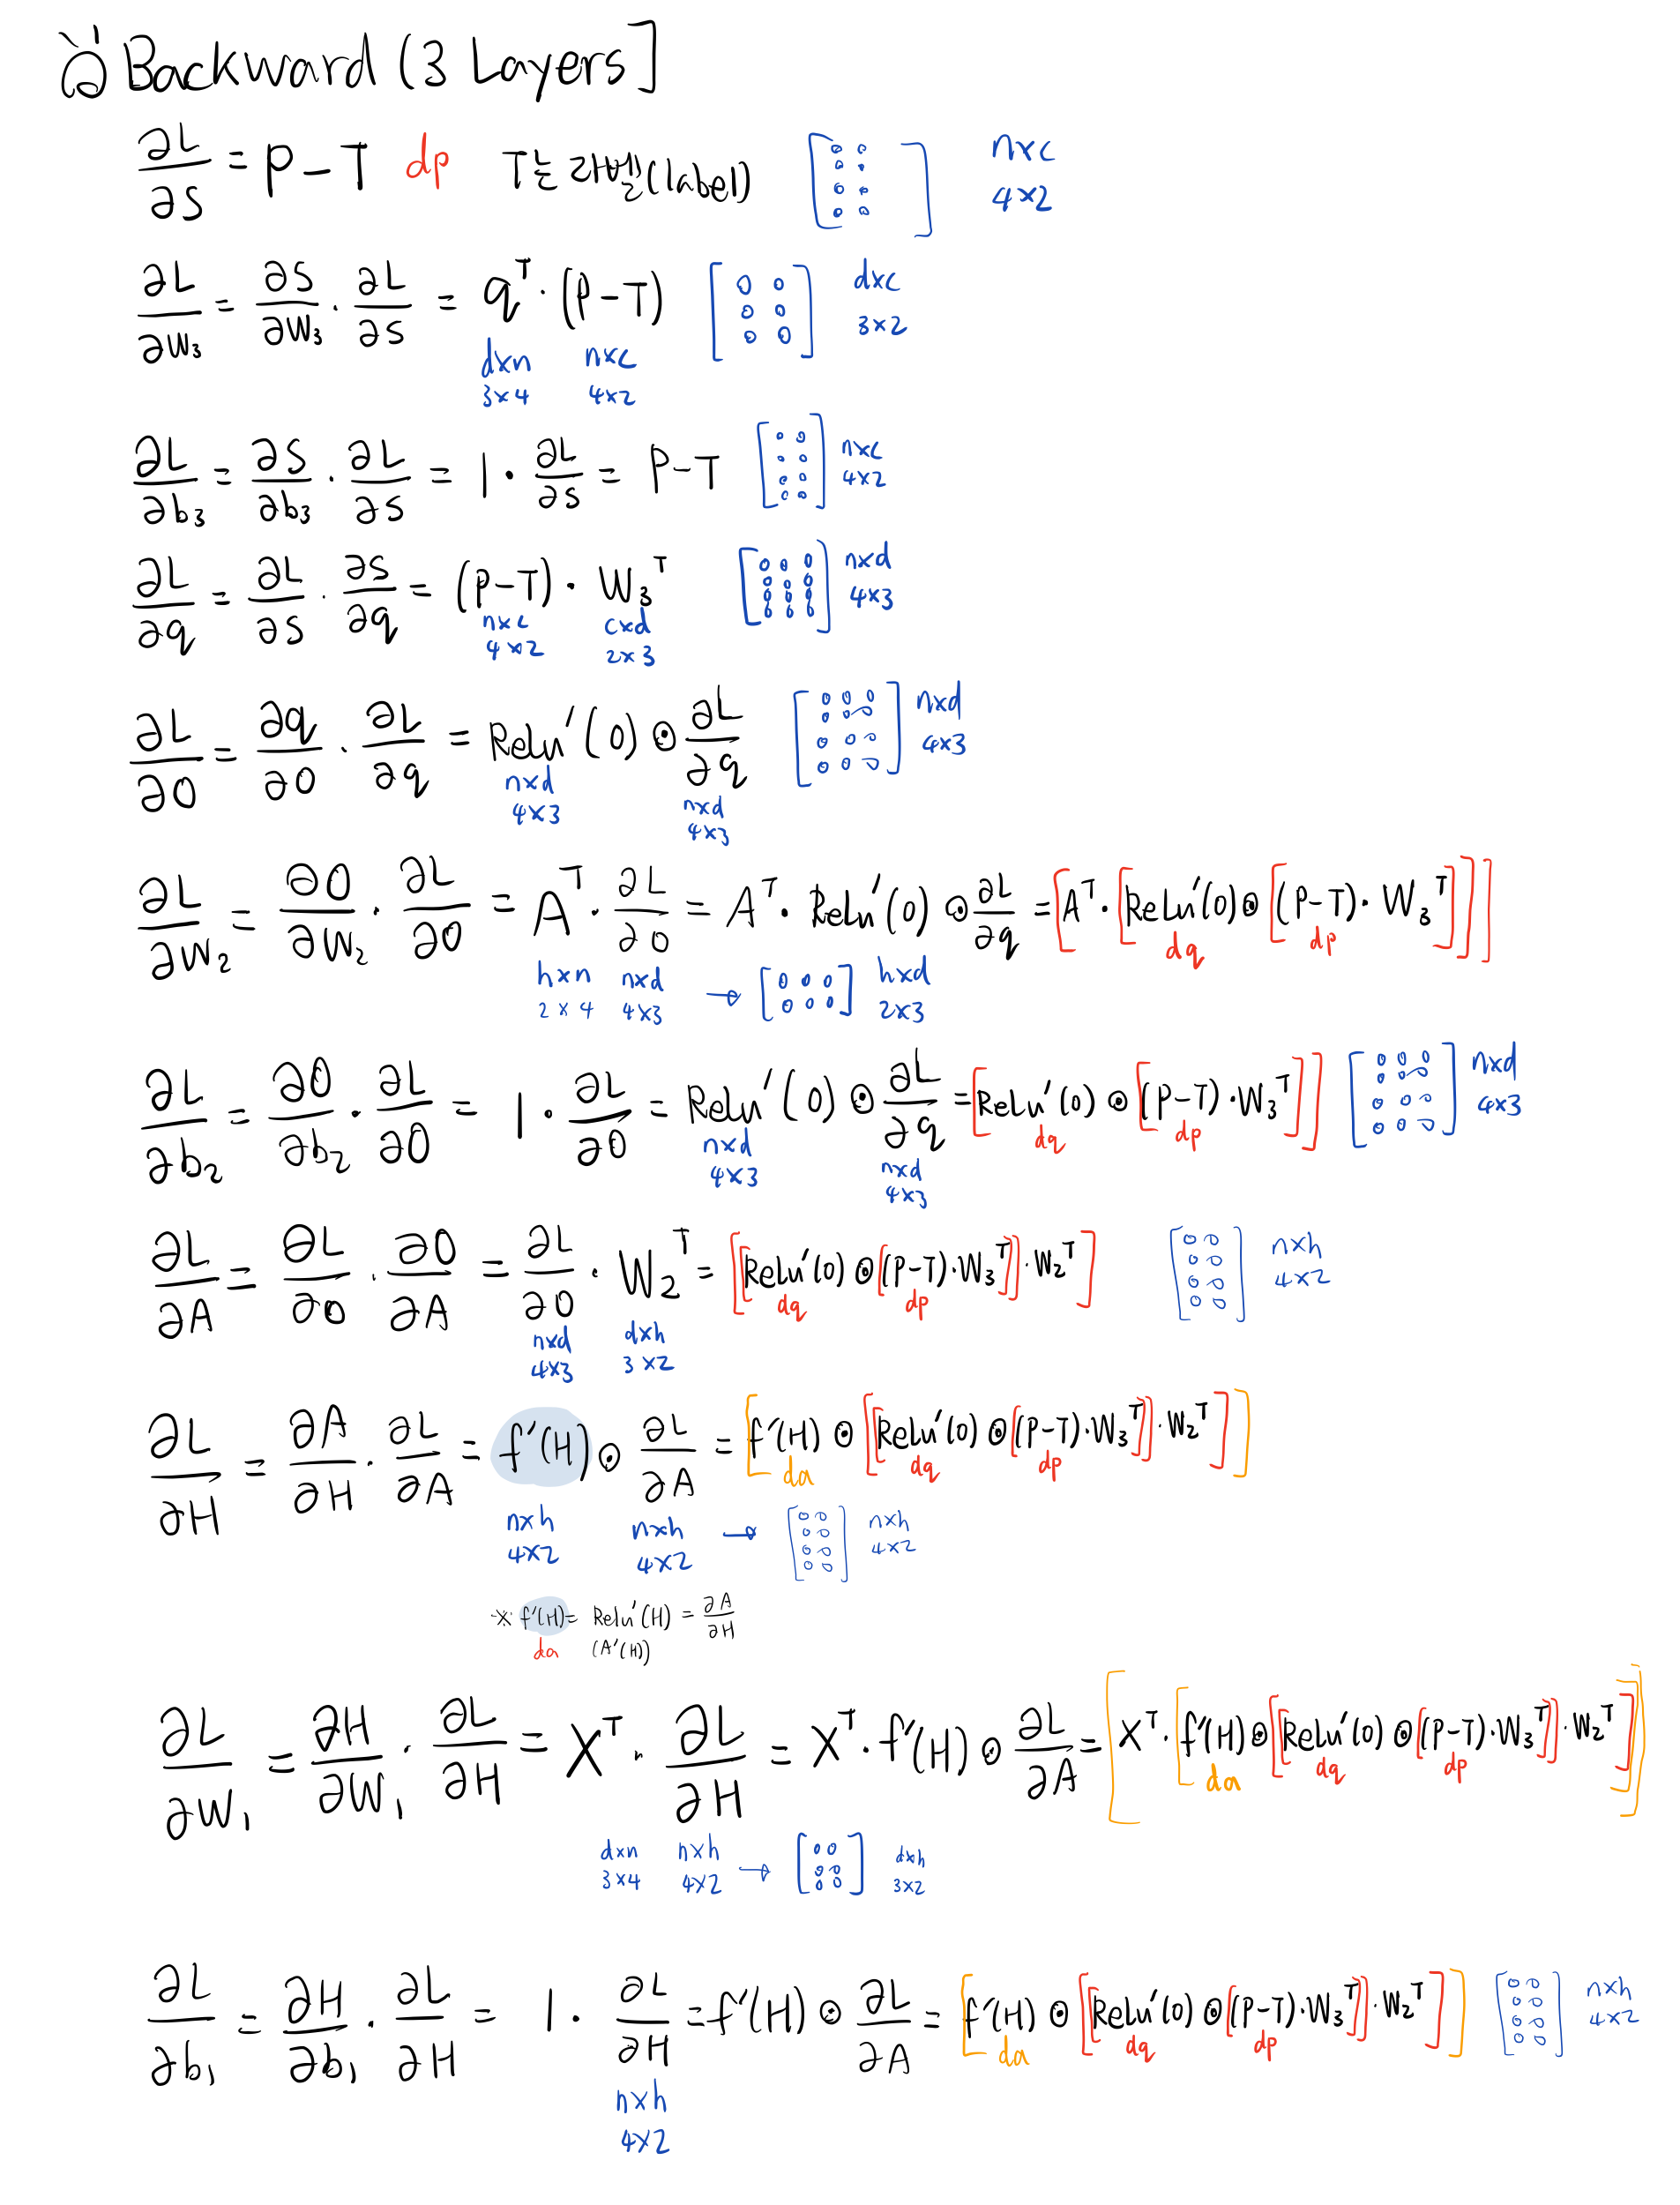

In [3]:
Image("3layer_backward.png")

# Assignment 2

**Model2L & Model3L & Model4L 3개 첨부했습니다**

# Assignment 3

### 데이터 load

keras 프레임워크를 이용하여 데이터를 로드해 옵니다.  
32*32*3차원의 데이터를 3072차원으로 바꾸는 것 까지 해드릴게요.
필요하면 sklearn.preprocessing의 scaler를 사용해보셔도 좋습니다!

In [14]:
from keras.datasets import cifar10
import numpy as np
from matplotlib import pyplot as plt

In [15]:
#data load
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
#check mean & std
print(np.mean(x_train))
print(np.std(x_train))

120.70756512369792
64.1500758911213


In [5]:
#basic info. about data
print ("Training data:")
print ("Number of examples: ", x_train.shape[0])
print ("Number of channels:",x_train.shape[3]) 
print ("Image size:", x_train.shape[1], x_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", x_test.shape[0])
print ("Number of channels:", x_test.shape[3])
print ("Image size:", x_test.shape[1], x_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


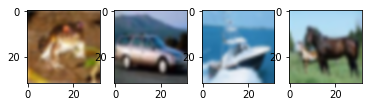

In [6]:
# check some parts of data just because of curiosity
# 궁금해서 찍어본 이미지
plt.subplot(141)
plt.imshow(x_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [7]:
#data normalization
#데이터 정규화

print ("mean before normalization:", np.mean(x_train)) 
print ("std before normalization:", np.std(x_train))

mean=[0,0,0]
std=[0,0,0]
newx_train = np.ones(x_train.shape)
newx_test = np.ones(x_test.shape)
#train set에 있는 데이터로만 평균과 표준편차를 구함
for i in range(3):
    mean[i] = np.mean(x_train[:,:,:,i])
    std[i] = np.std(x_train[:,:,:,i])

#train과 test셋 모두 정규화 작업    
for i in range(3):
    newx_train[:,:,:,i] = x_train[:,:,:,i] - mean[i]
    newx_train[:,:,:,i] = newx_train[:,:,:,i] / std[i]
    newx_test[:,:,:,i] = x_test[:,:,:,i] - mean[i]
    newx_test[:,:,:,i] = newx_test[:,:,:,i] / std[i]
        
x_train = newx_train
x_test = newx_test

print ("mean after normalization:", np.mean(x_train))
print ("std after normalization:", np.std(x_train))

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 4.91799193961621e-17
std after normalization: 0.9999999999999996


표준편차를 1로 줄인 이 정규화를 사용해보았으나, 성능에 차이가 없었다.

255로 나눠서 하는게 더 나을거 같다는 12기의 조언으로 밑 코드 전처리를 사용했다.

In [17]:
def preprocessing_data(x_train, x_test, y_train, y_test):
    #change dtype
    x_train = np.array(x_train, dtype=np.float64)
    x_test = np.array(x_test, dtype=np.float64)
    
    #reshaping
    x_train = np.reshape(x_train, (x_train.shape[0], -1))
    x_test = np.reshape(x_test, (x_test.shape[0], -1))
    
    y_train = np.reshape(y_train, (y_train.shape[0],))
    y_test = np.reshape(y_test, (y_test.shape[0],))
    
    #정규화대신 255로 나눠보라는 조언을 들었다 #각 픽셀값이 0-255이기 때문
    x_train = x_train/255
    x_test = x_test/255
    
    return x_train, x_test, y_train, y_test

In [18]:
x_train, x_test, y_train, y_test = preprocessing_data(x_train, x_test, y_train, y_test)

In [19]:
#check shape of data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000,)
(10000,)


데이터가 너무 많아서 5000개랑 1000개만 사용해보도록 할게요

In [21]:
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

### 데이터 확인

실제 데이터가 어떻게 생겼는지 한번 봅시다

In [20]:
#scaling 완료
x_train

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

### 하이퍼파라미터 설정


**가장 까다로웠고, 가장 오래걸렸고, 가장 프레임워크 쓰고 싶었던 부분이었다**

[구글링, 여러 인강을 통해 얻은 팁 아닌 팁]

1. hidden_size 는 보통 input_size와 output_size의 평균 언저리에서 잡는다고 한다.
2. 또한 128,256,512 등과 같이 2의 제곱수를 활용하는 것이 좋다. cifar 10 dataset과 관련한 논문을 보았는데 은닉층 노드 개수를 256으로 잡았을때 가장 성능이 좋았다고 한다.
3. hidden_layer의 개수를 늘릴 수록 back propagation과정에서 gradient vanishing 문제가 발생할 확률이 높아진다. 무작정 모델을 깊게 만든다고 모델의 학습능력이 올라가는 것이 아니다.
4. gradient vanishing과 같은 문제는 '가중치 초기화'로 어느정도 해결할 수 있는데 대표적으로 2006년 나왔던 RBM(요즘은 잘 안쓴다), Xavier와 He가 있다. 활성함수가 ReLU인 경우는 2015년 혜성처럼 등장한 'He initialization'을 쓴다고 한다. 모두를 위한 딥러닝 강의에서 김성교수님이 he를 쓰면 성능이 엄청 올라갈거라고 기대하라고 하셨는데 이번 과제에 적용해보니 차이가 없었다..ㅠ 프레임워크들에 이미 구현이 되어있기 때문에 텐서플로우나 파이토치에서 다시 제대로 써봐야겠다.
5. Optimization 과정에서 가장 기본으로 배웠던 SGD 말고도 모멘텀, Adagrad, Rmsprop, Adam 등이 있다.(다음 강의에 포함되어있기 때문에 제대로 배우고 시도해봐야겠다)

# 모델 생성

## 1) 2 Layers

In [9]:
# parameter 조정
input_size = 32 * 32 * 3
hidden_size = 128
output_size = 10
epoch_size = 3000
batch_size = 128
learning_rate = 1e-6
N = x_train.shape[0]

In [10]:
batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
x_batch = x_train[batch_mask]

In [11]:
# Model2L.py에서 생성한 TwoLayerNet 불러오기
from Model2L import TwoLayerNet

In [12]:
nn = TwoLayerNet(x_batch, input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [13]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        
        nn.backward(x_batch, t_batch, 1e-7) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))
    
    if i % 10 == 0:
        print(i, "test accuracy :", nn.accuracy(x_test, y_test))
        print(i, "test loss     :", nn.forward(x_test, y_test))

0 test accuracy : 0.109
0 test loss     : 2658.767645125361
10 test accuracy : 0.109
10 test loss     : 2635.652807909322
20 test accuracy : 0.109
20 test loss     : 2602.9667292722443
30 test accuracy : 0.139
30 test loss     : 2515.413831939969
40 test accuracy : 0.183
40 test loss     : 2384.58555470115
50 test accuracy : 0.215
50 test loss     : 2272.077413023902
60 test accuracy : 0.205
60 test loss     : 2214.091706185929
70 test accuracy : 0.229
70 test loss     : 2160.329316939526
80 test accuracy : 0.243
80 test loss     : 2115.1548948164746
90 test accuracy : 0.252
90 test loss     : 2083.5151082245425
100 test accuracy : 0.251
100 test loss     : 2061.637445592187
110 test accuracy : 0.26
110 test loss     : 2043.4984421974953
120 test accuracy : 0.268
120 test loss     : 2027.154220546592
130 test accuracy : 0.27
130 test loss     : 2010.4540797811428
140 test accuracy : 0.276
140 test loss     : 1992.976181844244
150 test accuracy : 0.286
150 test loss     : 1976.069786751

1270 test accuracy : 0.409
1270 test loss     : 1740.1455936597672
1280 test accuracy : 0.41
1280 test loss     : 1743.7074941450383
1290 test accuracy : 0.411
1290 test loss     : 1746.260905938658
1300 test accuracy : 0.411
1300 test loss     : 1748.6544030997904
1310 test accuracy : 0.41
1310 test loss     : 1748.3799978534055
1320 test accuracy : 0.407
1320 test loss     : 1752.4472853960856
1330 test accuracy : 0.41
1330 test loss     : 1753.6118482592924
1340 test accuracy : 0.41
1340 test loss     : 1757.6632090048536
1350 test accuracy : 0.414
1350 test loss     : 1756.8350579597043
1360 test accuracy : 0.413
1360 test loss     : 1764.3603789633582
1370 test accuracy : 0.412
1370 test loss     : 1766.0389507757225
1380 test accuracy : 0.413
1380 test loss     : 1771.3904230991488
1390 test accuracy : 0.41
1390 test loss     : 1770.759070925532
1400 test accuracy : 0.41
1400 test loss     : 1771.7243062930281
1410 test accuracy : 0.41
1410 test loss     : 1777.8162287530508
1420

2510 test accuracy : 0.399
2510 test loss     : 2274.113802074583
2520 test accuracy : 0.404
2520 test loss     : 2279.081293629893
2530 test accuracy : 0.399
2530 test loss     : 2287.1027356943723
2540 test accuracy : 0.395
2540 test loss     : 2292.1182405574377
2550 test accuracy : 0.399
2550 test loss     : 2292.1747710274853
2560 test accuracy : 0.396
2560 test loss     : 2299.6386442435387
2570 test accuracy : 0.394
2570 test loss     : 2304.247123840607
2580 test accuracy : 0.398
2580 test loss     : 2308.0821010967957
2590 test accuracy : 0.401
2590 test loss     : 2317.344269769045
2600 test accuracy : 0.396
2600 test loss     : 2319.1476784107285
2610 test accuracy : 0.397
2610 test loss     : 2325.310090439635
2620 test accuracy : 0.394
2620 test loss     : 2329.877997905432
2630 test accuracy : 0.395
2630 test loss     : 2338.7493189718657
2640 test accuracy : 0.394
2640 test loss     : 2340.6827611697713
2650 test accuracy : 0.397
2650 test loss     : 2346.203696824192
26

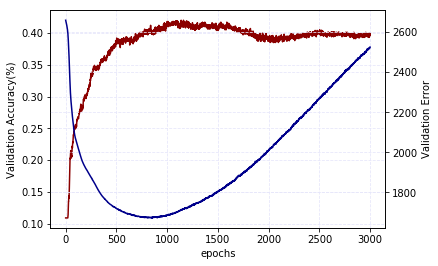

나의 최고 validation loss :  0.42


In [14]:
# 그래프 그리기
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation accuracy : ",max(history['val_acc']))

성능이 0.4를 찍고 나서부터는 별다른 변화가 없다. loss는 오히려 증가한다. epoch을 1000만 줬어도 충분했을거같다.

아니면 애초에 이 구간이 local minimum이었을 수도 있겠다.

## 2) 3 Layers

In [15]:
# parameter 조정
input_size = 32 * 32 * 3
hidden1_size = 200
hidden2_size = 128
output_size = 10
epoch_size = 8000
batch_size = 128
learning_rate = 1e-7
N = x_train.shape[0]

In [17]:
batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
x_batch = x_train[batch_mask]

In [18]:
# Model3L.py에서 생성한 ThreeLayerNet 불러오기
from Model3L import ThreeLayerNet

nn = ThreeLayerNet(x_batch, input_size=input_size, hidden1_size=hidden1_size, hidden2_size=hidden2_size, output_size=output_size)

In [19]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        
        nn.backward(x_batch, t_batch, 1e-7) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))
    
    if i % 10 == 0:
        print(i, "test accuracy :", nn.accuracy(x_test, y_test))
        print(i, "test loss     :", nn.forward(x_test, y_test))

0 test accuracy : 0.086
0 test loss     : 2676.3822103879916
10 test accuracy : 0.086
10 test loss     : 2659.427359408198
20 test accuracy : 0.086
20 test loss     : 2643.5586476034227
30 test accuracy : 0.086
30 test loss     : 2628.9163766879165
40 test accuracy : 0.086
40 test loss     : 2615.0072123637333
50 test accuracy : 0.086
50 test loss     : 2602.1940622932784
60 test accuracy : 0.086
60 test loss     : 2589.970679723485
70 test accuracy : 0.086
70 test loss     : 2578.642549292648
80 test accuracy : 0.086
80 test loss     : 2567.9214627799843
90 test accuracy : 0.086
90 test loss     : 2557.7158806879843
100 test accuracy : 0.086
100 test loss     : 2547.8666028342823
110 test accuracy : 0.086
110 test loss     : 2538.59545862956
120 test accuracy : 0.086
120 test loss     : 2529.863053901756
130 test accuracy : 0.086
130 test loss     : 2521.483282061095
140 test accuracy : 0.086
140 test loss     : 2513.3175059782097
150 test accuracy : 0.086
150 test loss     : 2505.480

1270 test accuracy : 0.165
1270 test loss     : 2169.137067484043
1280 test accuracy : 0.165
1280 test loss     : 2169.009104295687
1290 test accuracy : 0.163
1290 test loss     : 2168.9159655477297
1300 test accuracy : 0.163
1300 test loss     : 2168.8013415668697
1310 test accuracy : 0.165
1310 test loss     : 2168.692413616869
1320 test accuracy : 0.164
1320 test loss     : 2168.5310199577866
1330 test accuracy : 0.165
1330 test loss     : 2168.336600642942
1340 test accuracy : 0.165
1340 test loss     : 2168.3037060879
1350 test accuracy : 0.165
1350 test loss     : 2168.0743887847143
1360 test accuracy : 0.165
1360 test loss     : 2167.9086590298
1370 test accuracy : 0.166
1370 test loss     : 2167.783029868821
1380 test accuracy : 0.166
1380 test loss     : 2167.631037112121
1390 test accuracy : 0.166
1390 test loss     : 2167.627889621355
1400 test accuracy : 0.166
1400 test loss     : 2167.3988183731262
1410 test accuracy : 0.166
1410 test loss     : 2167.3326760844466
1420 tes

2510 test accuracy : 0.167
2510 test loss     : 2160.9526222666705
2520 test accuracy : 0.165
2520 test loss     : 2161.003726636373
2530 test accuracy : 0.166
2530 test loss     : 2160.906833029779
2540 test accuracy : 0.163
2540 test loss     : 2160.9933932494932
2550 test accuracy : 0.165
2550 test loss     : 2160.845931812519
2560 test accuracy : 0.164
2560 test loss     : 2160.789155681255
2570 test accuracy : 0.163
2570 test loss     : 2160.6370634151262
2580 test accuracy : 0.163
2580 test loss     : 2160.5940107989277
2590 test accuracy : 0.164
2590 test loss     : 2160.4577592175556
2600 test accuracy : 0.163
2600 test loss     : 2160.462119528645
2610 test accuracy : 0.164
2610 test loss     : 2160.510078352821
2620 test accuracy : 0.166
2620 test loss     : 2160.379814160531
2630 test accuracy : 0.165
2630 test loss     : 2160.466617763881
2640 test accuracy : 0.166
2640 test loss     : 2160.290615544081
2650 test accuracy : 0.164
2650 test loss     : 2160.3260622576768
2660

3750 test accuracy : 0.18
3750 test loss     : 2155.2094879031356
3760 test accuracy : 0.178
3760 test loss     : 2155.1303329763277
3770 test accuracy : 0.181
3770 test loss     : 2155.278144640633
3780 test accuracy : 0.18
3780 test loss     : 2155.2084011161714
3790 test accuracy : 0.179
3790 test loss     : 2155.36496142745
3800 test accuracy : 0.178
3800 test loss     : 2155.3508419621817
3810 test accuracy : 0.177
3810 test loss     : 2155.3336842248927
3820 test accuracy : 0.18
3820 test loss     : 2155.3618761082375
3830 test accuracy : 0.179
3830 test loss     : 2155.480031880589
3840 test accuracy : 0.178
3840 test loss     : 2155.504370904634
3850 test accuracy : 0.177
3850 test loss     : 2155.2572696526595
3860 test accuracy : 0.179
3860 test loss     : 2155.4531851363204
3870 test accuracy : 0.175
3870 test loss     : 2155.4959779444257
3880 test accuracy : 0.177
3880 test loss     : 2155.715053338976
3890 test accuracy : 0.176
3890 test loss     : 2155.6555349990094
3900

4990 test accuracy : 0.184
4990 test loss     : 2158.3818324275717
5000 test accuracy : 0.184
5000 test loss     : 2158.3686627438724
5010 test accuracy : 0.184
5010 test loss     : 2158.2785554404827
5020 test accuracy : 0.185
5020 test loss     : 2158.3765811901912
5030 test accuracy : 0.187
5030 test loss     : 2158.50825786249
5040 test accuracy : 0.185
5040 test loss     : 2158.4350816012748
5050 test accuracy : 0.184
5050 test loss     : 2158.415024892078
5060 test accuracy : 0.184
5060 test loss     : 2158.687344706858
5070 test accuracy : 0.185
5070 test loss     : 2158.70906177797
5080 test accuracy : 0.185
5080 test loss     : 2158.861739576696
5090 test accuracy : 0.185
5090 test loss     : 2158.6972218965707
5100 test accuracy : 0.183
5100 test loss     : 2158.6529600674976
5110 test accuracy : 0.181
5110 test loss     : 2158.673528669747
5120 test accuracy : 0.183
5120 test loss     : 2158.5712350677386
5130 test accuracy : 0.181
5130 test loss     : 2158.6484175897235
514

6230 test accuracy : 0.217
6230 test loss     : 2115.5549740248666
6240 test accuracy : 0.217
6240 test loss     : 2113.5548673999942
6250 test accuracy : 0.22
6250 test loss     : 2111.2885023719823
6260 test accuracy : 0.216
6260 test loss     : 2109.4255099512993
6270 test accuracy : 0.22
6270 test loss     : 2107.4327499123397
6280 test accuracy : 0.224
6280 test loss     : 2104.890480565263
6290 test accuracy : 0.223
6290 test loss     : 2102.663535919698
6300 test accuracy : 0.228
6300 test loss     : 2100.268773333397
6310 test accuracy : 0.237
6310 test loss     : 2098.677893468507
6320 test accuracy : 0.237
6320 test loss     : 2096.691790117458
6330 test accuracy : 0.231
6330 test loss     : 2094.3919815719264
6340 test accuracy : 0.236
6340 test loss     : 2092.4414214685594
6350 test accuracy : 0.231
6350 test loss     : 2090.4777706407426
6360 test accuracy : 0.234
6360 test loss     : 2088.402004936712
6370 test accuracy : 0.239
6370 test loss     : 2086.6936237489113
638

7470 test accuracy : 0.274
7470 test loss     : 1958.8121439235651
7480 test accuracy : 0.273
7480 test loss     : 1958.1401985859213
7490 test accuracy : 0.276
7490 test loss     : 1957.8858109732296
7500 test accuracy : 0.276
7500 test loss     : 1957.1263419237264
7510 test accuracy : 0.278
7510 test loss     : 1956.2277907735424
7520 test accuracy : 0.276
7520 test loss     : 1955.7935307670043
7530 test accuracy : 0.277
7530 test loss     : 1954.6504002503123
7540 test accuracy : 0.278
7540 test loss     : 1953.9585980516447
7550 test accuracy : 0.28
7550 test loss     : 1952.9555037720272
7560 test accuracy : 0.28
7560 test loss     : 1952.497251739597
7570 test accuracy : 0.28
7570 test loss     : 1952.145735276316
7580 test accuracy : 0.282
7580 test loss     : 1951.6261932873863
7590 test accuracy : 0.281
7590 test loss     : 1950.7010551454132
7600 test accuracy : 0.281
7600 test loss     : 1950.1368510743898
7610 test accuracy : 0.282
7610 test loss     : 1949.9958270580864


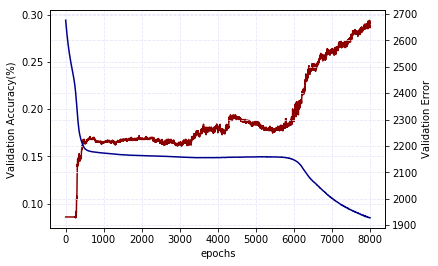

나의 최고 validation accuracy :  0.294


In [20]:
# 그래프 그리기
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation accuracy : ",max(history['val_acc']))

쭉쭉 올라가기 시작할 즈음에 끊겼다. epoch을 더 크게 잡았어야 했나 보다.

시간관계상 다른 페이지에서 12000epoch 버전을 추가로 돌려보았다.(결과는 이미지 파일로 첨부)

In [22]:
# parameter 조정
input_size = 32 * 32 * 3
hidden1_size = 256 #얘도 200에서 256으로 바꿔봄
hidden2_size = 128
output_size = 10
epoch_size = 12000 #epoch 8000->12000
batch_size = 128
learning_rate = 1e-7
N = x_train.shape[0]

In [23]:
batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
x_batch = x_train[batch_mask]

In [24]:
# Model3L.py에서 생성한 ThreeLayerNet 불러오기
from Model3L import ThreeLayerNet

nn = ThreeLayerNet(x_batch, input_size=input_size, hidden1_size=hidden1_size, hidden2_size=hidden2_size, output_size=output_size)

In [ ]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        
        nn.backward(x_batch, t_batch, 1e-7) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))
    
    if i % 10 == 0:
        print(i, "test accuracy :", nn.accuracy(x_test, y_test))
        print(i, "test loss     :", nn.forward(x_test, y_test))

In [ ]:
# 그래프 그리기 #epoch 12000
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation accuracy : ",max(history['val_acc']))

위 5개 코드를 다시 돌리려면 시간이 너무 많이 오바되어서 결과만 이미지로 첨부한점 양해 부탁드립니당

**그래서 파라미터 조정한 3layers 의 결과는~?**

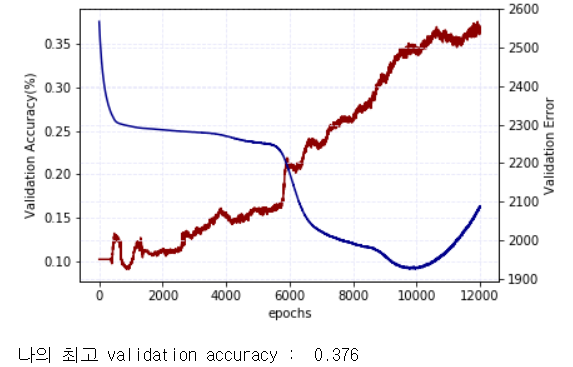

In [4]:
Image("result3.png")

0.376으로 확실히 많이 올랐다!

하지만 10000 epoch이후부터 loss가 다시 증가하는 것으로 보아 10000 epoch 지점이 local minimum이었을 수도 있을 것이란 생각이 들었다.

## 3) 4 Layers

In [21]:
# parameter 조정
input_size = 32 * 32 * 3
hidden1_size = 512
hidden2_size = 256
hidden3_size = 128
output_size = 10
epoch_size = 10000
batch_size = 128
learning_rate = 1e-7
N = x_train.shape[0]

In [22]:
batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
x_batch = x_train[batch_mask]

In [23]:
# Model4L.py에서 생성한 FourLayerNet 불러오기
from Model4L import FourLayerNet

nn = FourLayerNet(x_batch, input_size=input_size, hidden1_size=hidden1_size, hidden2_size=hidden2_size, hidden3_size=hidden3_size, output_size=output_size)

In [ ]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        
        nn.backward(x_batch, t_batch, 1e-7) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))
    
    if i % 10 == 0:
        print(i, "test accuracy :", nn.accuracy(x_test, y_test))
        print(i, "test loss     :", nn.forward(x_test, y_test))

0 test accuracy : 0.106
0 test loss     : 2468.2782755444387
10 test accuracy : 0.106
10 test loss     : 2460.143164746432
20 test accuracy : 0.106
20 test loss     : 2452.5443816320476
30 test accuracy : 0.106
30 test loss     : 2445.4881624402024
40 test accuracy : 0.106
40 test loss     : 2438.647182099817
50 test accuracy : 0.106
50 test loss     : 2432.2753964278427
60 test accuracy : 0.106
60 test loss     : 2426.15962539698
70 test accuracy : 0.106
70 test loss     : 2420.3253954626534
80 test accuracy : 0.106
80 test loss     : 2414.77985867654
90 test accuracy : 0.106
90 test loss     : 2409.4520257372924
100 test accuracy : 0.106
100 test loss     : 2404.364944584435
110 test accuracy : 0.106
110 test loss     : 2399.4113227388607
120 test accuracy : 0.106
120 test loss     : 2394.7872436175785
130 test accuracy : 0.106
130 test loss     : 2390.303015622044
140 test accuracy : 0.106
140 test loss     : 2386.0947891411265
150 test accuracy : 0.106
150 test loss     : 2382.0918

1270 test accuracy : 0.106
1270 test loss     : 2301.853591534079
1280 test accuracy : 0.106
1280 test loss     : 2301.852460799938
1290 test accuracy : 0.106
1290 test loss     : 2301.8310576070885
1300 test accuracy : 0.1
1300 test loss     : 2301.854252077717
1310 test accuracy : 0.106
1310 test loss     : 2301.854592250754
1320 test accuracy : 0.1
1320 test loss     : 2301.8753809495247
1330 test accuracy : 0.1
1330 test loss     : 2301.8515899450463
1340 test accuracy : 0.1
1340 test loss     : 2301.8439796608363
1350 test accuracy : 0.1
1350 test loss     : 2301.836800639337
1360 test accuracy : 0.1
1360 test loss     : 2301.848966666282
1370 test accuracy : 0.1
1370 test loss     : 2301.8543249287927
1380 test accuracy : 0.1
1380 test loss     : 2301.8516495376116
1390 test accuracy : 0.1
1390 test loss     : 2301.82923531974
1400 test accuracy : 0.1
1400 test loss     : 2301.857756686337
1410 test accuracy : 0.106
1410 test loss     : 2301.8755546619104
1420 test accuracy : 0.1

2510 test accuracy : 0.106
2510 test loss     : 2301.8875345711044
2520 test accuracy : 0.106
2520 test loss     : 2301.8857881153117
2530 test accuracy : 0.106
2530 test loss     : 2301.876698461104
2540 test accuracy : 0.106
2540 test loss     : 2301.897287673917
2550 test accuracy : 0.106
2550 test loss     : 2301.882893055126
2560 test accuracy : 0.106
2560 test loss     : 2301.879697338242
2570 test accuracy : 0.106
2570 test loss     : 2301.8885527043903
2580 test accuracy : 0.106
2580 test loss     : 2301.897145245062
2590 test accuracy : 0.1
2590 test loss     : 2301.89256997
2600 test accuracy : 0.1
2600 test loss     : 2301.898597897396
2610 test accuracy : 0.106
2610 test loss     : 2301.898548602982
2620 test accuracy : 0.106
2620 test loss     : 2301.9189267278607
2630 test accuracy : 0.09
2630 test loss     : 2301.9264405785207
2640 test accuracy : 0.112
2640 test loss     : 2301.920293067287
2650 test accuracy : 0.112
2650 test loss     : 2301.922770792914
2660 test accu

3770 test accuracy : 0.09
3770 test loss     : 2301.9117861794775
3780 test accuracy : 0.09
3780 test loss     : 2301.9037742323053
3790 test accuracy : 0.09
3790 test loss     : 2301.9313266818453
3800 test accuracy : 0.112
3800 test loss     : 2301.9097655298474
3810 test accuracy : 0.112
3810 test loss     : 2301.898296969841
3820 test accuracy : 0.09
3820 test loss     : 2301.9289539250467
3830 test accuracy : 0.112
3830 test loss     : 2301.9164532822265
3840 test accuracy : 0.106
3840 test loss     : 2301.909701582616
3850 test accuracy : 0.106
3850 test loss     : 2301.907210103593
3860 test accuracy : 0.106
3860 test loss     : 2301.911913249506
3870 test accuracy : 0.09
3870 test loss     : 2301.905826203465
3880 test accuracy : 0.106
3880 test loss     : 2301.905150528053
3890 test accuracy : 0.106
3890 test loss     : 2301.9064086570706
3900 test accuracy : 0.106
3900 test loss     : 2301.9109861912207
3910 test accuracy : 0.102
3910 test loss     : 2301.9200881687884
3920 t

5010 test accuracy : 0.106
5010 test loss     : 2301.8417947871235
5020 test accuracy : 0.106
5020 test loss     : 2301.84247633199
5030 test accuracy : 0.106
5030 test loss     : 2301.8260432788784
5040 test accuracy : 0.106
5040 test loss     : 2301.8323411686283
5050 test accuracy : 0.106
5050 test loss     : 2301.8221316240583
5060 test accuracy : 0.106
5060 test loss     : 2301.8447438220282
5070 test accuracy : 0.106
5070 test loss     : 2301.844122758653
5080 test accuracy : 0.106
5080 test loss     : 2301.8402915030647
5090 test accuracy : 0.106
5090 test loss     : 2301.844017401985
5100 test accuracy : 0.106
5100 test loss     : 2301.840550976146
5110 test accuracy : 0.106
5110 test loss     : 2301.8649111471564
5120 test accuracy : 0.106
5120 test loss     : 2301.873172748331


1000번째부터 Loss값이 2301을 벗어나지 못하고 있다. 문제가 있다. 이 상태로 10000epoch까지 진행하는건 무리가 있다고 판단하여 5000epoch에서 중단

파라미터 조정하고 다시 돌려보기로 했다.

In [8]:
# parameter 다시 조정
input_size = 32 * 32 * 3
hidden1_size = 256 #512->256
hidden2_size = 256
hidden3_size = 128
output_size = 10
epoch_size = 10000
batch_size = 128
learning_rate = 1e-8 #1e-7 ->1e-8
N = x_train.shape[0]

In [10]:
batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
x_batch = x_train[batch_mask]

In [11]:
# Model4L.py에서 생성한 FourLayerNet 불러오기
from Model4L import FourLayerNet

nn = FourLayerNet(x_batch, input_size=input_size, hidden1_size=hidden1_size, hidden2_size=hidden2_size, hidden3_size=hidden3_size, output_size=output_size)

In [12]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        
        nn.backward(x_batch, t_batch, 1e-7) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))
    
    if i % 10 == 0:
        print(i, "test accuracy :", nn.accuracy(x_test, y_test))
        print(i, "test loss     :", nn.forward(x_test, y_test))

0 test accuracy : 0.089
0 test loss     : 2424.134548981803
10 test accuracy : 0.089
10 test loss     : 2416.0707993232845
20 test accuracy : 0.089
20 test loss     : 2408.600459614034
30 test accuracy : 0.089
30 test loss     : 2401.7249893945627
40 test accuracy : 0.089
40 test loss     : 2395.282701436285
50 test accuracy : 0.089
50 test loss     : 2389.2718859093934
60 test accuracy : 0.089
60 test loss     : 2383.6274127038723
70 test accuracy : 0.089
70 test loss     : 2378.318169983899
80 test accuracy : 0.089
80 test loss     : 2373.375627166003
90 test accuracy : 0.089
90 test loss     : 2368.847065929477
100 test accuracy : 0.089
100 test loss     : 2364.6607634908023
110 test accuracy : 0.089
110 test loss     : 2360.7796903511394
120 test accuracy : 0.089
120 test loss     : 2356.9894799999506
130 test accuracy : 0.089
130 test loss     : 2353.574858055024
140 test accuracy : 0.089
140 test loss     : 2350.262779785001
150 test accuracy : 0.089
150 test loss     : 2347.1991

1290 test accuracy : 0.09
1290 test loss     : 2301.9845051423226
1300 test accuracy : 0.09
1300 test loss     : 2301.984889598926
1310 test accuracy : 0.09
1310 test loss     : 2301.9746412953305
1320 test accuracy : 0.09
1320 test loss     : 2301.978991560453
1330 test accuracy : 0.09
1330 test loss     : 2302.0020548138546
1340 test accuracy : 0.09
1340 test loss     : 2302.012157238463
1350 test accuracy : 0.09
1350 test loss     : 2302.0114325684003
1360 test accuracy : 0.09
1360 test loss     : 2302.0150533141577
1370 test accuracy : 0.106
1370 test loss     : 2302.0123527599835
1380 test accuracy : 0.106
1380 test loss     : 2302.0010067728167
1390 test accuracy : 0.106
1390 test loss     : 2301.9969368710867
1400 test accuracy : 0.09
1400 test loss     : 2301.9995801905866
1410 test accuracy : 0.09
1410 test loss     : 2301.9856708064235
1420 test accuracy : 0.09
1420 test loss     : 2301.998481617418
1430 test accuracy : 0.09
1430 test loss     : 2301.9977005047003
1440 test a

2540 test accuracy : 0.106
2540 test loss     : 2301.8819854146213
2550 test accuracy : 0.106
2550 test loss     : 2301.8881426750677
2560 test accuracy : 0.106
2560 test loss     : 2301.9104496795726
2570 test accuracy : 0.106
2570 test loss     : 2301.918374008459
2580 test accuracy : 0.106
2580 test loss     : 2301.8775239932074
2590 test accuracy : 0.106
2590 test loss     : 2301.8742095650723
2600 test accuracy : 0.106
2600 test loss     : 2301.8610777005024
2610 test accuracy : 0.106
2610 test loss     : 2301.859303451853
2620 test accuracy : 0.106
2620 test loss     : 2301.8509538428534
2630 test accuracy : 0.106
2630 test loss     : 2301.8518198486313
2640 test accuracy : 0.106
2640 test loss     : 2301.8573867075525
2650 test accuracy : 0.106
2650 test loss     : 2301.8803180641107
2660 test accuracy : 0.106
2660 test loss     : 2301.904310401875
2670 test accuracy : 0.106
2670 test loss     : 2301.893936360505
2680 test accuracy : 0.106
2680 test loss     : 2301.896443162374


3790 test accuracy : 0.1
3790 test loss     : 2301.8974836597336
3800 test accuracy : 0.1
3800 test loss     : 2301.8923225816097
3810 test accuracy : 0.1
3810 test loss     : 2301.890859927458
3820 test accuracy : 0.1
3820 test loss     : 2301.884173676233
3830 test accuracy : 0.106
3830 test loss     : 2301.888827691733
3840 test accuracy : 0.106
3840 test loss     : 2301.8855550888948
3850 test accuracy : 0.106
3850 test loss     : 2301.860705792719
3860 test accuracy : 0.106
3860 test loss     : 2301.846038896936
3870 test accuracy : 0.106
3870 test loss     : 2301.848275551025
3880 test accuracy : 0.106
3880 test loss     : 2301.836226919191
3890 test accuracy : 0.106
3890 test loss     : 2301.827772652561
3900 test accuracy : 0.106
3900 test loss     : 2301.8389146205827
3910 test accuracy : 0.106
3910 test loss     : 2301.831586943635
3920 test accuracy : 0.112
3920 test loss     : 2301.8350173776003
3930 test accuracy : 0.106
3930 test loss     : 2301.8650683869287
3940 test ac

5030 test accuracy : 0.09
5030 test loss     : 2301.9873811536568
5040 test accuracy : 0.09
5040 test loss     : 2301.976795162456
5050 test accuracy : 0.09
5050 test loss     : 2301.967861168685
5060 test accuracy : 0.09
5060 test loss     : 2301.9504315199383
5070 test accuracy : 0.09
5070 test loss     : 2301.9371941480854
5080 test accuracy : 0.106
5080 test loss     : 2301.938580755809
5090 test accuracy : 0.106
5090 test loss     : 2301.9409578535265
5100 test accuracy : 0.106
5100 test loss     : 2301.919573875586
5110 test accuracy : 0.106
5110 test loss     : 2301.905261255759
5120 test accuracy : 0.09
5120 test loss     : 2301.921808720823
5130 test accuracy : 0.09
5130 test loss     : 2301.92631448289
5140 test accuracy : 0.09
5140 test loss     : 2301.9204748933726
5150 test accuracy : 0.09
5150 test loss     : 2301.9295059339556
5160 test accuracy : 0.09
5160 test loss     : 2301.924994655629
5170 test accuracy : 0.106
5170 test loss     : 2301.9157427832206
5180 test accu

6270 test accuracy : 0.106
6270 test loss     : 2301.864058797264
6280 test accuracy : 0.106
6280 test loss     : 2301.8405553696393
6290 test accuracy : 0.106
6290 test loss     : 2301.864700630411
6300 test accuracy : 0.106
6300 test loss     : 2301.868136126626
6310 test accuracy : 0.106
6310 test loss     : 2301.876617354247
6320 test accuracy : 0.112
6320 test loss     : 2301.8418324803574
6330 test accuracy : 0.112
6330 test loss     : 2301.8563757107613
6340 test accuracy : 0.106
6340 test loss     : 2301.858509141009
6350 test accuracy : 0.106
6350 test loss     : 2301.8701773054863
6360 test accuracy : 0.106
6360 test loss     : 2301.865307602356
6370 test accuracy : 0.112
6370 test loss     : 2301.860079443514
6380 test accuracy : 0.112
6380 test loss     : 2301.851364697521
6390 test accuracy : 0.106
6390 test loss     : 2301.8427002427497
6400 test accuracy : 0.112
6400 test loss     : 2301.84828722394
6410 test accuracy : 0.112
6410 test loss     : 2301.854548161962
6420 t

7510 test accuracy : 0.112
7510 test loss     : 2301.8865119276925
7520 test accuracy : 0.112
7520 test loss     : 2301.872671329015
7530 test accuracy : 0.112
7530 test loss     : 2301.8915178291622
7540 test accuracy : 0.112
7540 test loss     : 2301.886040390735
7550 test accuracy : 0.112
7550 test loss     : 2301.8918679144044
7560 test accuracy : 0.09
7560 test loss     : 2301.9127734304993
7570 test accuracy : 0.09
7570 test loss     : 2301.931451210521
7580 test accuracy : 0.09
7580 test loss     : 2301.91040325894
7590 test accuracy : 0.09
7590 test loss     : 2301.9233647536084
7600 test accuracy : 0.09
7600 test loss     : 2301.9383432900254
7610 test accuracy : 0.09
7610 test loss     : 2301.911569576193
7620 test accuracy : 0.112
7620 test loss     : 2301.8899855768873
7630 test accuracy : 0.09
7630 test loss     : 2301.8932599692007
7640 test accuracy : 0.09
7640 test loss     : 2301.9046735550864
7650 test accuracy : 0.09
7650 test loss     : 2301.9031524401944
7660 test 

8750 test accuracy : 0.106
8750 test loss     : 2301.926225106221
8760 test accuracy : 0.1
8760 test loss     : 2301.942044771978
8770 test accuracy : 0.106
8770 test loss     : 2301.9523679283466
8780 test accuracy : 0.106
8780 test loss     : 2301.9382196342017
8790 test accuracy : 0.106
8790 test loss     : 2301.9374775197853
8800 test accuracy : 0.106
8800 test loss     : 2301.9200267243386
8810 test accuracy : 0.106
8810 test loss     : 2301.8983230484987
8820 test accuracy : 0.106
8820 test loss     : 2301.906675333125
8830 test accuracy : 0.106
8830 test loss     : 2301.9097046563193
8840 test accuracy : 0.106
8840 test loss     : 2301.905773567589
8850 test accuracy : 0.106
8850 test loss     : 2301.89493020131
8860 test accuracy : 0.106
8860 test loss     : 2301.8813169491586
8870 test accuracy : 0.106
8870 test loss     : 2301.8787368861535
8880 test accuracy : 0.106
8880 test loss     : 2301.874424952139
8890 test accuracy : 0.106
8890 test loss     : 2301.864974822183
8900 

역시나 마의 2301 구간을 벗어나지 못하고 있다... (너무 슬프다ㅠ)

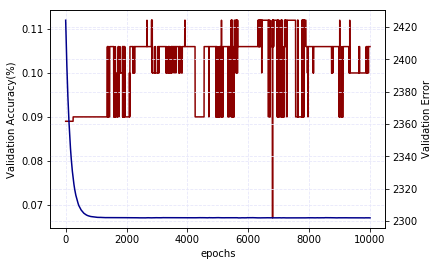

나의 최고 validation accuracy :  0.112


In [13]:
# 그래프 그리기
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation accuracy : ",max(history['val_acc']))

개인적으로 지금까지 봤던 그래프 중에 가장 슬픈 그래프다. 4 layers가 성능을 내지 못했던 이유에 대해서는 더 공부해봐야겠다.

피드백 주신다면 공부하기 더 수월할거같다.

**[추가과제를 수행하면서 느낀점]**
1. 하이퍼파라미터 튜닝은 정말 어려운 것이다...
2. 패키지를 쓰지 않고 직접 모델을 구현해서 돌리는 작업은 상당한 노력과 시간이 필요한 것이다.. 
3. 하지만 모델 성능은 시간과 노력에 비례하지 않는다...
4. 그렇지만 노력은 언제나 보람차다...
5. 다음 과제도 화이팅....